In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
df = pd.read_csv(r"C:\Users\prito\Downloads\credit_card_fraud_dataset.csv")
df.head()

,Transaction_ID,Name,Gender,Location,Merchant_Category,Time,V1,V2,V3,V4,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,TX1000,Kara,Male,Seattle,Entertainment,121958,1.870424,-1.250996,0.365301,-1.450712,...,-1.046206,0.678740,-1.148311,-1.217623,-0.660539,-0.719223,0.766563,-0.961533,204.65,0
1,TX1001,Bob,Female,Los Angeles,Fuel,146867,1.688017,2.605977,1.402072,-0.316753,...,-1.187270,-1.603179,-0.455234,1.172624,-0.513371,-0.564646,-1.575582,-0.155352,296.72,1
2,TX1002,Alice,Male,Seattle,Fuel,131932,-0.615245,-0.732940,-1.993931,-0.508455,...,0.872790,2.139424,1.893954,2.051646,1.386046,-0.525106,0.177014,0.465921,18.93,0
3,TX1003,Liam,Female,New York,Dining,103694,0.382799,-0.361461,1.218337,-0.115173,...,-0.827264,1.755802,0.325445,0.108111,-0.549170,-0.042920,-1.225788,-1.372338,241.93,0
4,TX1004,Eve,Male,Chicago,Entertainment,119879,0.492141,-0.819264,-2.515038,0.829325,...,1.377930,-0.773215,-1.006433,1.569174,-0.111795,0.304451,0.045812,-0.043529,430.00,0


In [45]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,84774.35200,0.040955,0.095287,-0.025639,0.072141,0.032132,0.022953,-0.067192,-0.001492,-0.037044,...,-0.013622,-0.012868,0.018945,-0.012918,0.026851,-0.054241,0.005259,0.014261,250.601280,0.090000
std,48631.25773,1.063153,1.064588,0.969335,0.984911,1.003356,0.992641,0.987685,1.004866,0.973088,...,0.969800,1.013324,0.995925,1.022997,1.011114,0.978256,1.003318,0.984811,147.463454,0.286468
min,769.00000,-3.364096,-2.609842,-3.351611,-2.924925,-3.386814,-2.843485,-3.339500,-2.891833,-3.045929,...,-2.503089,-3.365296,-2.816609,-2.771419,-2.610593,-2.471234,-2.992756,-2.677628,1.430000,0.000000
25%,40679.75000,-0.679618,-0.622721,-0.683825,-0.619411,-0.617648,-0.657769,-0.791453,-0.644589,-0.681833,...,-0.703401,-0.747160,-0.584209,-0.770662,-0.651945,-0.733601,-0.693714,-0.609654,114.752500,0.000000
50%,90917.00000,0.056066,0.044918,-0.004831,0.085854,0.082904,-0.031348,-0.047188,0.000248,-0.039294,...,0.006031,-0.041720,0.016960,-0.050453,-0.026770,-0.000532,-0.010654,0.051102,247.485000,0.000000
75%,124153.00000,0.808881,0.821366,0.620797,0.758772,0.723442,0.737668,0.677364,0.681413,0.619136,...,0.678133,0.672361,0.683760,0.685101,0.729673,0.585437,0.652123,0.669053,379.605000,0.000000
max,171890.00000,2.976197,3.167372,2.699714,3.495878,2.562528,2.533516,2.920753,2.896519,3.226132,...,3.061136,3.418612,2.916278,3.029093,2.521031,2.549536,3.317583,2.704797,499.850000,1.000000


In [47]:
df.isnull().sum()

Transaction_ID       0
Name                 0
Gender               0
Location             0
Merchant_Category    0
Time                 0
V1                   0
V2                   0
V3                   0
V4                   0
V5                   0
V6                   0
V7                   0
V8                   0
V9                   0
V10                  0
V11                  0
V12                  0
V13                  0
V14                  0
V15                  0
V16                  0
V17                  0
V18                  0
V19                  0
V20                  0
V21                  0
V22                  0
V23                  0
V24                  0
V25                  0
V26                  0
V27                  0
V28                  0
Amount               0
Class                0
dtype: int64

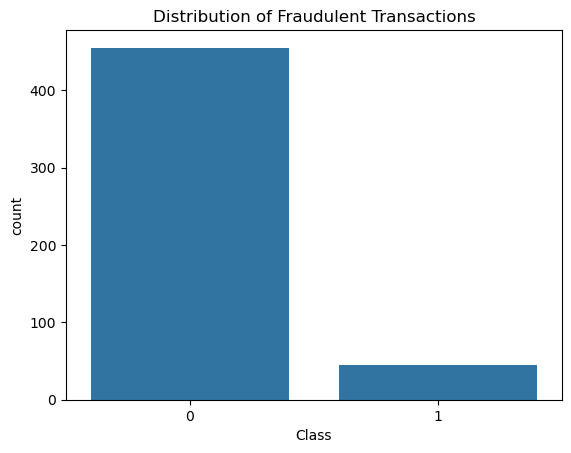

In [49]:
sns.countplot(x = 'Class',data = df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

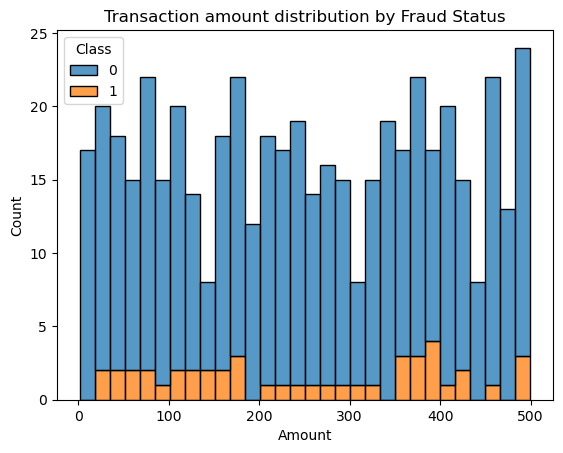

In [51]:
sns.histplot(data = df, x = 'Amount', hue = 'Class', multiple = 'stack', bins = 30)
plt.title('Transaction amount distribution by Fraud Status')
plt.show()

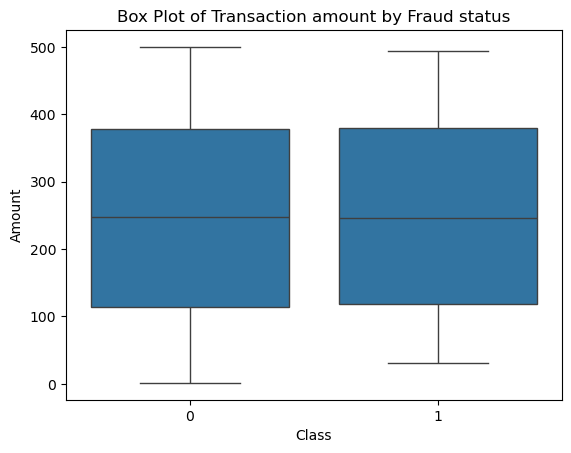

In [53]:
sns.boxplot(x = 'Class', y = 'Amount', data = df)
plt.title('Box Plot of Transaction amount by Fraud status')
plt.show()

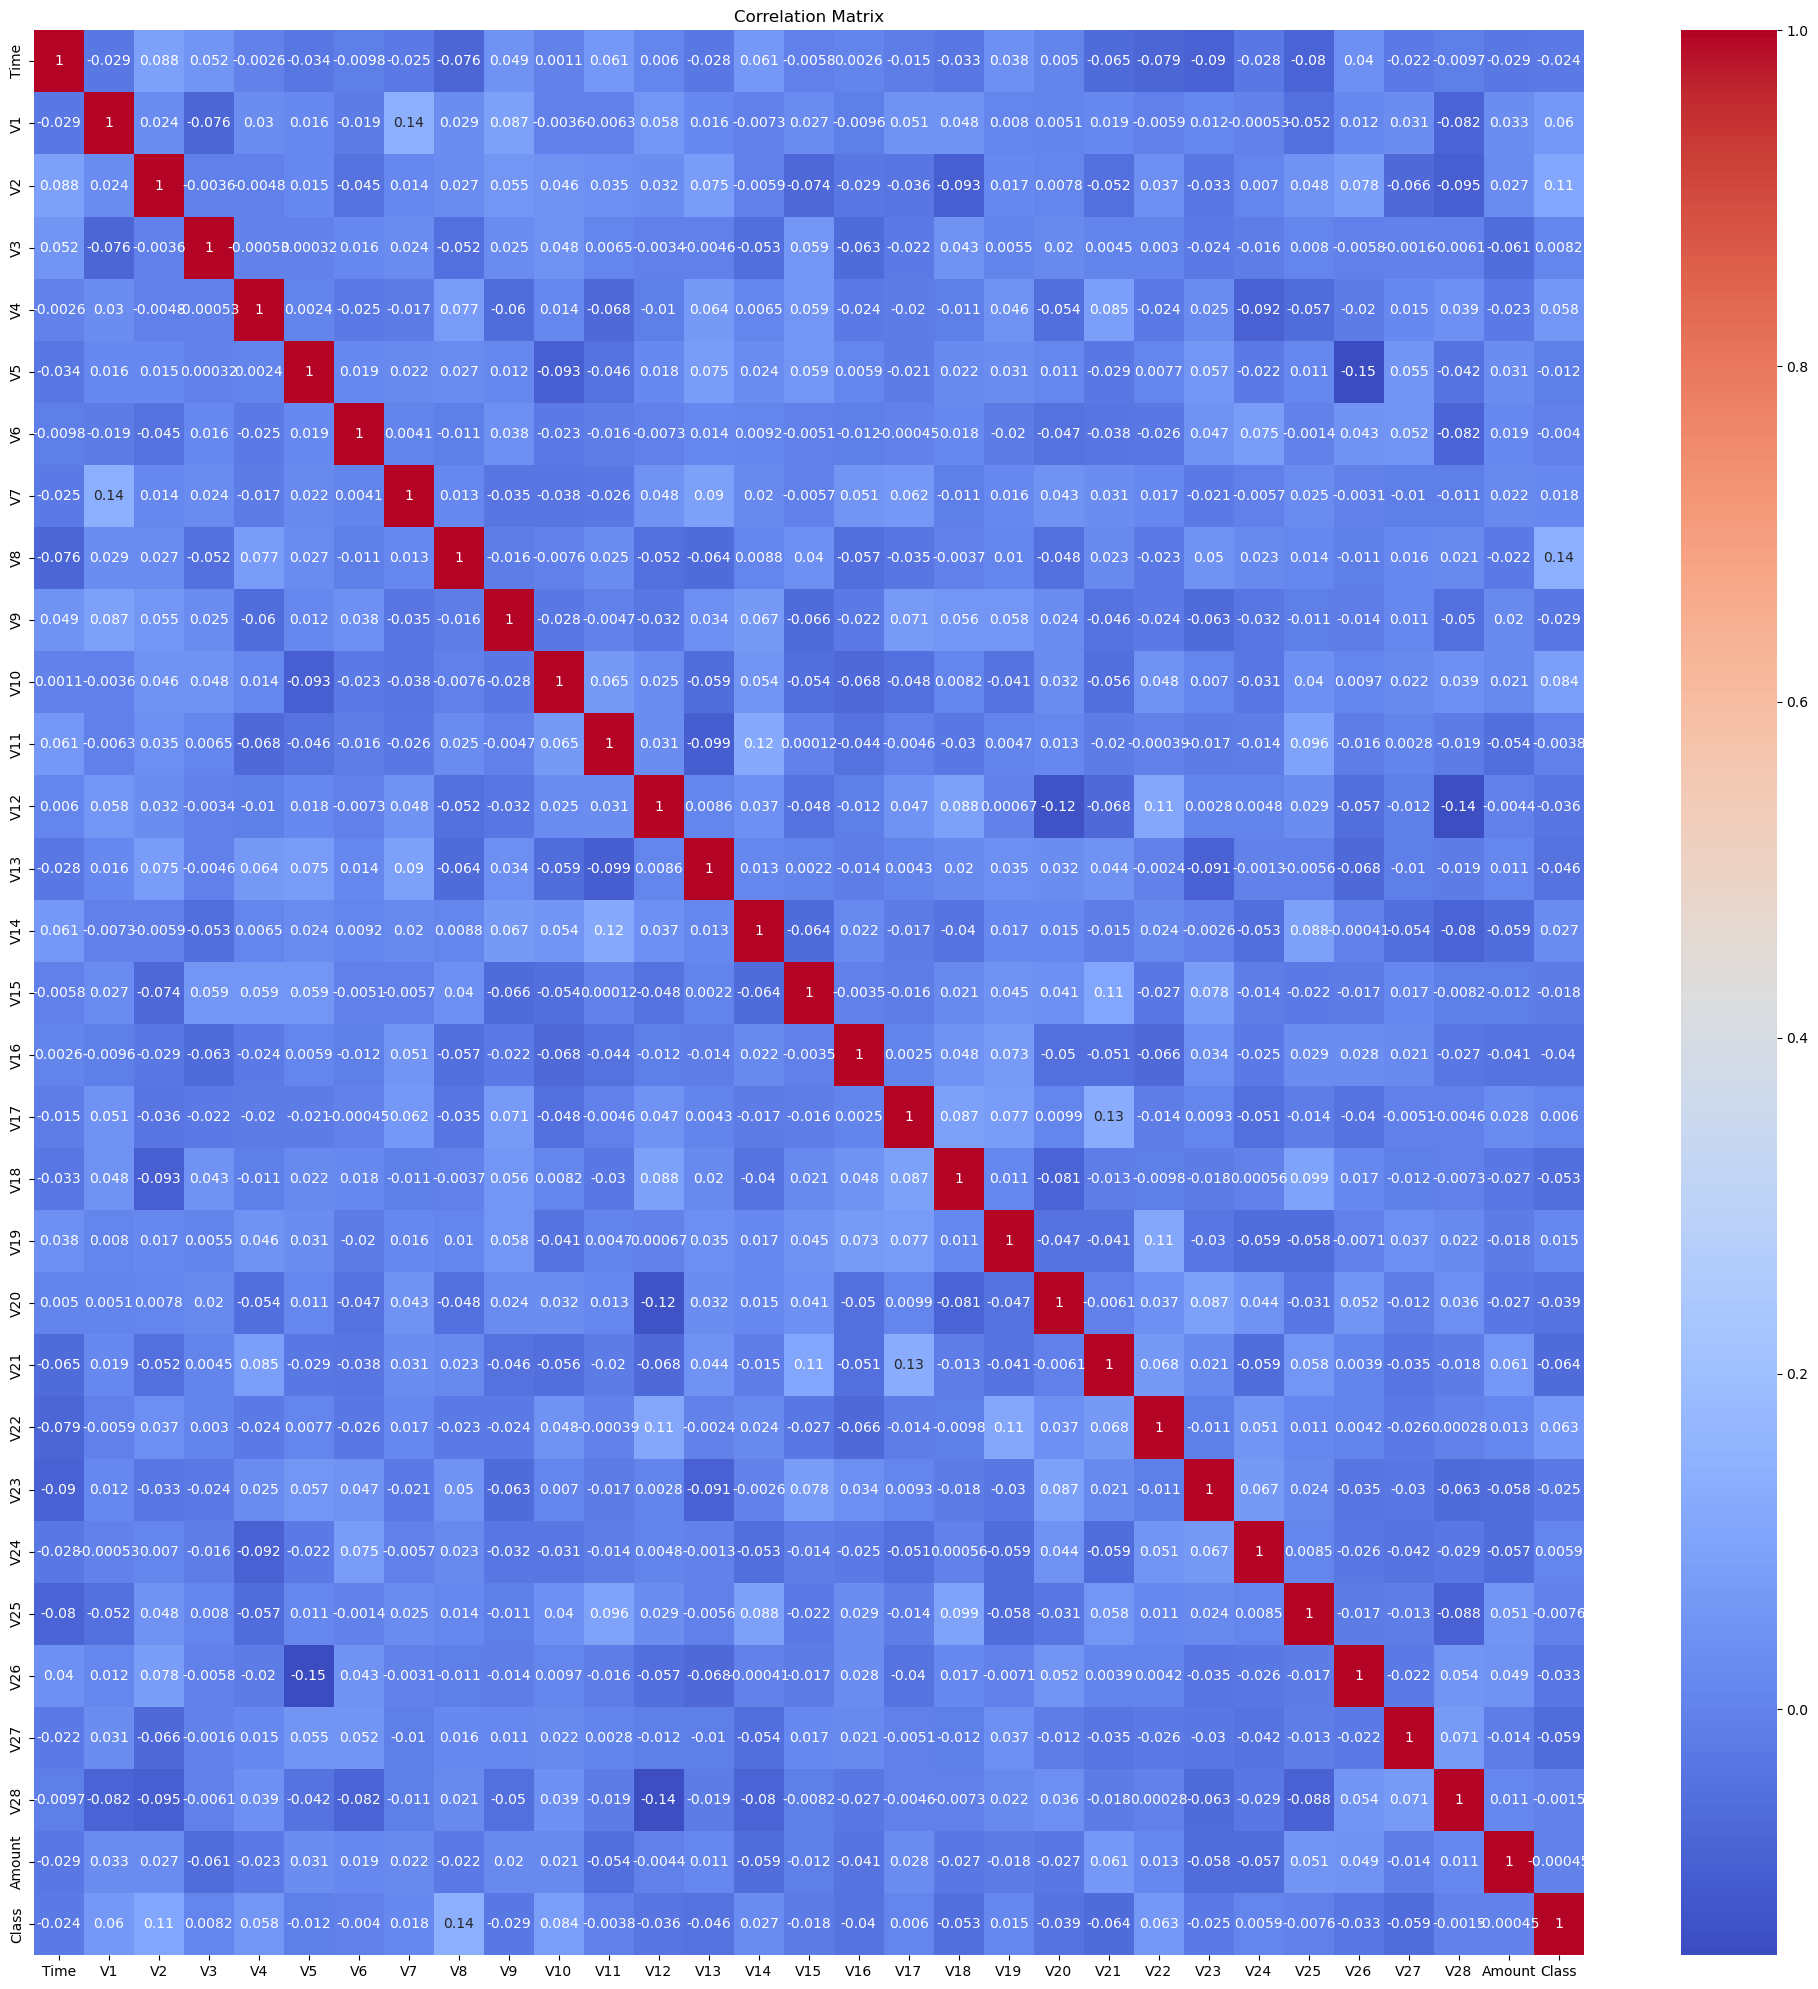

In [55]:
num_cols = list()
for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [65]:
label_encoders = {}
for column in ['Name', 'Gender', 'Location', 'Merchant_Category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(['Transaction_ID', 'Class'], axis =1)
Y = df['Class']

In [67]:
X.head()

,Name,Gender,Location,Merchant_Category,Time,V1,V2,V3,V4,V5,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,10,1,7,3,121958,1.870424,-1.250996,0.365301,-1.450712,-1.748382,...,0.458754,-1.046206,0.678740,-1.148311,-1.217623,-0.660539,-0.719223,0.766563,-0.961533,204.65
1,1,0,2,4,146867,1.688017,2.605977,1.402072,-0.316753,0.133094,...,1.879583,-1.187270,-1.603179,-0.455234,1.172624,-0.513371,-0.564646,-1.575582,-0.155352,296.72
2,0,1,7,4,131932,-0.615245,-0.732940,-1.993931,-0.508455,-0.324773,...,0.368753,0.872790,2.139424,1.893954,2.051646,1.386046,-0.525106,0.177014,0.465921,18.93
3,11,0,4,1,103694,0.382799,-0.361461,1.218337,-0.115173,2.300396,...,0.170094,-0.827264,1.755802,0.325445,0.108111,-0.549170,-0.042920,-1.225788,-1.372338,241.93
4,4,1,0,3,119879,0.492141,-0.819264,-2.515038,0.829325,0.475366,...,-1.216009,1.377930,-0.773215,-1.006433,1.569174,-0.111795,0.304451,0.045812,-0.043529,430.00


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [71]:
#Feature Scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(Y_test, logreg_pred)

In [79]:
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(Y_test, logreg_pred))

Logistic Regression Accuracy: 88.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       135
           1       0.20      0.07      0.10        15

    accuracy                           0.88       150
   macro avg       0.55      0.52      0.52       150
weighted avg       0.83      0.88      0.85       150

